In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def gaussian(x: np.ndarray, y: np.ndarray, mean_point: tuple[float, float], std: float) -> np.ndarray:
    def gauss(values: np.ndarray, mean: float) -> np.ndarray:
        return 1/(std * (2*np.pi)**(1/2)) * np.exp(-0.5*(values - mean)**2 / std**2)
    x_gauss = gauss(x, mean=mean_point[0])
    y_gauss = gauss(y, mean=mean_point[1])
    return x_gauss * y_gauss

In [3]:
def create_smooth_labels(target_points: list[tuple[float, float]], target_std: float, grid_size: tuple[int, int]) -> np.ndarray:
    labels = np.empty((len(target_points), *grid_size), dtype=np.float32)
    
    x_range = np.arange(grid_size[0])
    y_range = np.arange(grid_size[1])
    x, y = np.meshgrid(x_range, y_range)

    for i, point in enumerate(target_points):
        labels[i] = gaussian(x, y, mean_point=point, std=target_std)

    return labels

In [4]:
probability_maps = create_smooth_labels(
    target_points=[(0, 0), (4.5, 4.5), (1, 6), (8, 8)],
    target_std=2,
    grid_size=(10, 10),
)

<Axes: >

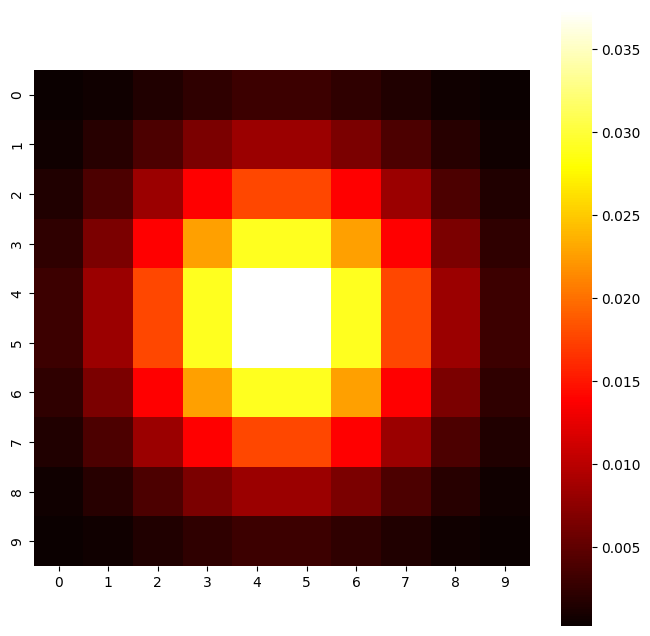

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
sns.heatmap(probability_maps[1], square=True, cmap="hot", ax=ax)